In [251]:
# Importar las librerías necesarias
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [252]:
# Cargar un dataset de ejemplo de dimensión 2 que sea linealmente separable 
# de clasificación
#X, y = datasets.make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, 
#                                    n_classes=2, flip_y=0, random_state=42)

# Cargar un dataset de ejemplo de dimensión 2 que sea linealmente separable sin ruido
X, y = datasets.make_blobs(n_samples=200, n_features=2, centers=2, cluster_std=2.5, random_state=42)





In [253]:

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [254]:
# Entrenar un SVM con kernel lineal
svm = SVC(kernel='linear', C=100)
svm.fit(X_train, y_train)

SVC(C=100, kernel='linear')

In [255]:
# Obtener los vectores de soporte
support_vectors = svm.support_vectors_
num_support_vectors = len(support_vectors)
print(f'Número de vectores de soporte: {num_support_vectors}')

Número de vectores de soporte: 3


In [256]:

# Predecir y calcular la precisión
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Número de vectores de soporte: {num_support_vectors}')
print(f'Precisión en el conjunto de test: {accuracy:.2f}')
print('Una precisión de 1.0 indica un modelo perfecto, mientras que una precisión de 0.0 indica un modelo completamente incorrecto.')

Número de vectores de soporte: 3
Precisión en el conjunto de test: 0.99
Una precisión de 1.0 indica un modelo perfecto, mientras que una precisión de 0.0 indica un modelo completamente incorrecto.


In [257]:

# Obtener los coeficientes del hiperplano (solo para kernel lineal)
coef = svm.coef_
intercept = svm.intercept_
print(f'Coeficientes del hiperplano: {coef}')
print(f'Intercepto del hiperplano: {intercept}')
print('Los coeficientes del hiperplano son los pesos asignados a cada característica en la función de decisión del SVM. El intercepto es el sesgo del hiperplano.')
print('El hiperplano es la frontera de decisión que separa las clases en un SVM con kernel lineal.')





Coeficientes del hiperplano: [[ 1.58415523 -1.40350815]]
Intercepto del hiperplano: [7.95476262]
Los coeficientes del hiperplano son los pesos asignados a cada característica en la función de decisión del SVM. El intercepto es el sesgo del hiperplano.
El hiperplano es la frontera de decisión que separa las clases en un SVM con kernel lineal.


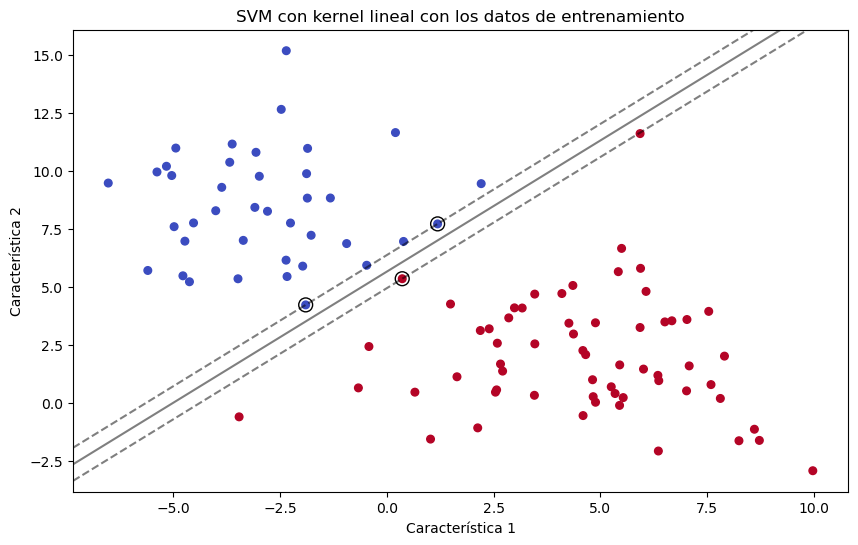

In [258]:

# Visualizar el hiperplano en un gráfico 2D
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', s=30)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# Visualizar el hiperplano
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
# Resaltar los vectores de soporte
ax.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('SVM con kernel lineal con los datos de entrenamiento')
plt.show()



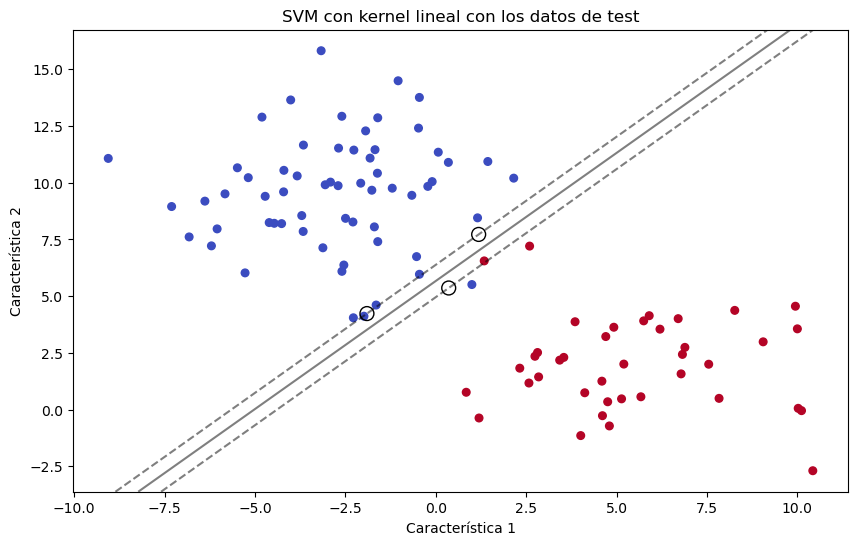

In [259]:
# Mismo gráfico pero para el conjunto de test
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', s=30)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# Visualizar el hiperplano
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
# Resaltar los vectores de soporte
ax.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('SVM con kernel lineal con los datos de test')
plt.show()


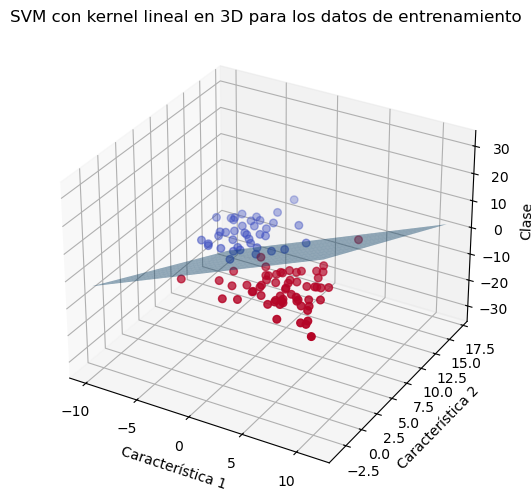

In [260]:
# Graficar el hiperplano en 3D con las clases como valor de z
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:, 0], X_train[:, 1], y_train, c=y_train, cmap='coolwarm', s=30)
ax.set_xlabel('Característica 1')
ax.set_ylabel('Característica 2')
ax.set_zlabel('Clase')
# Visualizar el hiperplano
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm.decision_function(xy).reshape(XX.shape)
ax.plot_surface(XX, YY, Z, alpha=0.5)
plt.title('SVM con kernel lineal en 3D para los datos de entrenamiento')
plt.show()


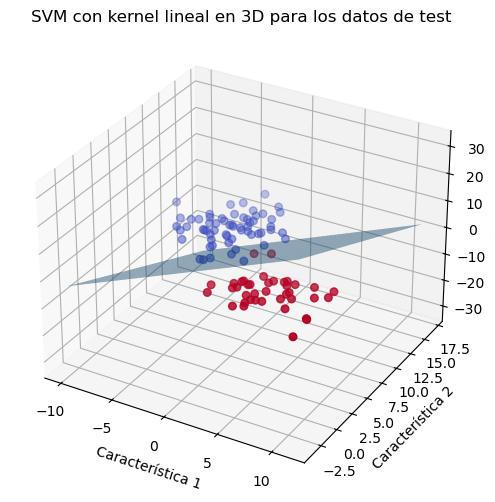

In [261]:
# Idem para los datos de test
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test[:, 0], X_test[:, 1], y_test, c=y_test, cmap='coolwarm', s=30)
ax.set_xlabel('Característica 1')
ax.set_ylabel('Característica 2')
ax.set_zlabel('Clase')
# Visualizar el hiperplano
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm.decision_function(xy).reshape(XX.shape)
ax.plot_surface(XX, YY, Z, alpha=0.5)
plt.title('SVM con kernel lineal en 3D para los datos de test')
plt.show()
